In [10]:
import numpy as np
from DataProcessing import Data
import matplotlib.pyplot as plt
import seaborn as sns                       
from sklearn.ensemble import RandomForestRegressor
sns.set_theme(color_codes=True)

# 1. Get Data 

## 1.1. Get Data from folder

In [11]:
d = Data()
d.get_index_names()
chosen_index = 'GOOGL'
d.preprocess(chosen_index)
df = d.get_data(chosen_index)
df= df.drop(['Date', 'Volume'],axis=1)
df.columns

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']
Processing GOOGL.csv
Saved GOOGL data at data/processed/GOOGL.csv


Index(['High', 'Low', 'Close', 'RSI', 'MFI', 'EMA', 'SO', 'MACD',
       'Next Day Price'],
      dtype='object')

# 2. Train model

In [12]:
INPUT_SHAPE=8
X = df[df.columns[0:INPUT_SHAPE]].values
Y = df[df.columns[INPUT_SHAPE]].values

## 2.1. Split data

In [13]:
TRAIN_PERCENT = 0.7
train_size = int(TRAIN_PERCENT*len(X))

X_train = X[0:train_size]
Y_train = Y[0:train_size]
X_test = X[train_size:len(X)]
Y_test = Y[train_size:len(Y)]

## 2.2. Train model

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.96636131058952

# Evaluation

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

predictions = model.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y_test, predictions)
print(f'R-squared: {r2}')

rmse = root_mean_squared_error(Y_test, predictions)
print(f'Root Mean Squared Error: {rmse}')

mape = mean_absolute_percentage_error(Y_test, predictions)
print(f'Mean Absolute Percentage Error: {mape}')

mae = np.mean(np.abs(predictions - Y_test))
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 12.000559923249096
R-squared: 0.96636131058952
Root Mean Squared Error: 3.4641824321546775
Mean Absolute Percentage Error: 0.02507163678325723
Mean Absolute Error: 2.7027979774271107


## Plot Result

In [16]:
Y_predict = model.predict(X_test)

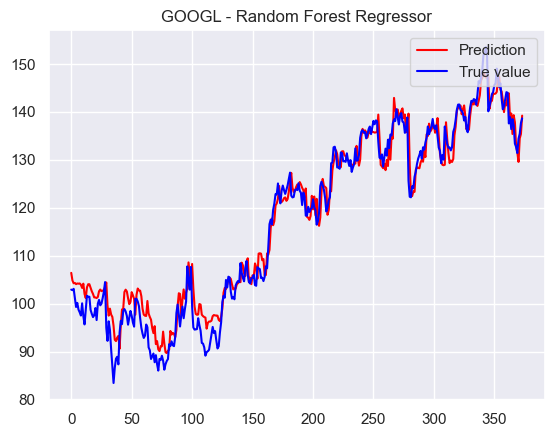

In [17]:
plt.plot(Y_predict,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - Random Forest Regressor')
plt.show()